In [1]:
# Analysing USDJPY

In [2]:
#!pip install numpy 
#!pip install pandas
#!pip install datetime
#!pip install matplotlib.pyplot as plt
#!pip install mplfinance as mpf
#!pip install seaborn as sns
!pip install talib as ta
!pip install math

ERROR: Could not find a version that satisfies the requirement talib
ERROR: No matching distribution found for talib
ERROR: Could not find a version that satisfies the requirement math
ERROR: No matching distribution found for math


In [3]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import talib

In [4]:
#!pip install yfinance

In [5]:
import yfinance as yf

In [6]:
# Downloading XAUUSD company from Yahoo Finance
df= yf.download("GC=F", period ="7d", interval="5m")

[*********************100%***********************]  1 of 1 completed


In [7]:
#df

In [8]:
#Writing a strategy to code to generate a buy and sell signal as per guidelines
# 1 . Moving average crossover 3, 8 , if 3 is above 8 , buy signal
# 2. If 8 Moving Average above 3, generate a sell signal


In [9]:
# Extraction values of SMA 3 and SMA 8 

In [10]:
# Considering only closing values for predicting trend
Close = df["Close"]

In [11]:
# Checking the datatype of Close
print(type(Close))

<class 'pandas.core.series.Series'>


In [12]:
# Extracting 3 sma using talib library
sma3 = talib.SMA(Close, timeperiod = 3)

In [13]:
# Printing sma8
sma3

Datetime
2021-05-26 00:00:00-04:00            NaN
2021-05-26 00:05:00-04:00            NaN
2021-05-26 00:10:00-04:00    1906.799967
2021-05-26 00:15:00-04:00    1906.899984
2021-05-26 00:20:00-04:00    1907.000000
                                ...     
2021-06-03 12:55:00-04:00    1872.566650
2021-06-03 13:00:00-04:00    1872.766642
2021-06-03 13:05:00-04:00    1872.733317
2021-06-03 13:10:00-04:00    1872.933350
2021-06-03 13:13:40-04:00    1873.133341
Length: 1521, dtype: float64

In [14]:
# Extracting 8 sma using talib library
sma8 = talib.SMA(Close, timeperiod = 8)

In [15]:
# Printing sma8 
sma8

Datetime
2021-05-26 00:00:00-04:00            NaN
2021-05-26 00:05:00-04:00            NaN
2021-05-26 00:10:00-04:00            NaN
2021-05-26 00:15:00-04:00            NaN
2021-05-26 00:20:00-04:00            NaN
                                ...     
2021-06-03 12:55:00-04:00    1871.874985
2021-06-03 13:00:00-04:00    1872.174988
2021-06-03 13:05:00-04:00    1872.299988
2021-06-03 13:10:00-04:00    1872.512497
2021-06-03 13:13:40-04:00    1872.712494
Length: 1521, dtype: float64

In [16]:
# Checking the datatype of sma8
print(type(sma8))

<class 'pandas.core.series.Series'>


In [17]:
# Creating a new column by incorporating the difference between SMA3 and SMA8
df["sma3"] = sma3
df["sma8"] = sma8

In [18]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,NaN,NaN
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,NaN,NaN
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,NaN
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,NaN
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,NaN
...,...,...,...,...,...,...,...,...
2021-06-03 12:55:00-04:00,1872.699951,1872.800049,1872.099976,1872.699951,1872.699951,560,1872.566650,1871.874985
2021-06-03 13:00:00-04:00,1872.699951,1873.500000,1872.500000,1872.900024,1872.900024,802,1872.766642,1872.174988
2021-06-03 13:05:00-04:00,1872.800049,1872.900024,1871.900024,1872.599976,1872.599976,591,1872.733317,1872.299988


In [19]:
# Filling NAN vales backwards for Dataframe
df =df.fillna( method = "bfill")

In [20]:
# Printing dataframe after filling missing/nan values
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,1906.799967,1906.912506
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,1906.799967,1906.912506
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,1906.912506
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,1906.912506
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,1906.912506
...,...,...,...,...,...,...,...,...
2021-06-03 12:55:00-04:00,1872.699951,1872.800049,1872.099976,1872.699951,1872.699951,560,1872.566650,1871.874985
2021-06-03 13:00:00-04:00,1872.699951,1873.500000,1872.500000,1872.900024,1872.900024,802,1872.766642,1872.174988
2021-06-03 13:05:00-04:00,1872.800049,1872.900024,1871.900024,1872.599976,1872.599976,591,1872.733317,1872.299988


In [21]:
# Check when 3 sma if greater than or less than 8sma, print a buy signal or else print a sell signal.

In [22]:
dir(talib)

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [23]:
# Check Atr value 
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,1906.799967,1906.912506
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,1906.799967,1906.912506
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,1906.912506
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,1906.912506
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,1906.912506
...,...,...,...,...,...,...,...,...
2021-06-03 12:55:00-04:00,1872.699951,1872.800049,1872.099976,1872.699951,1872.699951,560,1872.566650,1871.874985
2021-06-03 13:00:00-04:00,1872.699951,1873.500000,1872.500000,1872.900024,1872.900024,802,1872.766642,1872.174988
2021-06-03 13:05:00-04:00,1872.800049,1872.900024,1871.900024,1872.599976,1872.599976,591,1872.733317,1872.299988


In [24]:
df["Diff"] = sma3-sma8


In [25]:
# Generating ATR Values for 7 days
df["Atr"] = talib.ATR(df["High"].values,df["Low"].values,df["Close"].values, timeperiod = 7)

In [26]:
# Initialize Bollinger Bands Indicator
period = 20 # We can optimise it
stdNbr = 2 # We can optimise it
# Moving Averages , simple
indicator_bb = talib.BBANDS(df["Close"].values, timeperiod = period, nbdevup=stdNbr,nbdevdn=stdNbr,matype=0)                            
df["Upperband"] = indicator_bb[0]
df["Middleband"] = indicator_bb[1]
df["Lowerband"] = indicator_bb[2]

In [27]:
indicator_bb

(array([          nan,           nan,           nan, ..., 1873.31467603,
        1873.49063368, 1873.67293532]),
 array([          nan,           nan,           nan, ..., 1871.68999634,
        1871.83499756, 1871.98499756]),
 array([          nan,           nan,           nan, ..., 1870.06531665,
        1870.17936144, 1870.2970598 ]))

In [28]:
# MACD Indicator
macd, signal, hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [29]:
# Checkiing the type of variables
print(type(macd))
print(type(signal))
print(type(hist))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [30]:
# Converting pandas to dataframe and adding to df
df["MACD"] = macd
df["MACDSignal"] = signal
df["MACDHist"] = hist

In [31]:
#MFI' in indicator:
period = 14 # We can optimize it
mfi = talib.MFI(df["High"], df["Low"], df["Close"], df["Volume"], timeperiod= period)

In [32]:
# Adding column to df
df["MFI"] = mfi

In [33]:
# Calculating  RSI values 
period =14
source =df["Close"]
df["RSI"] = talib.RSI(source, timeperiod=period)

In [34]:
# William % Indicator

In [35]:
williamvalue = talib.WILLR(df["High"], df["Low"], df["Close"])
df["William%"] = williamvalue

In [36]:
# # 3 Black Crow Candlesticks
res = talib.CDL3BLACKCROWS( df["Open"], df["High"], df["Low"], df["Close"])

In [37]:
print(res)

Datetime
2021-05-26 00:00:00-04:00    0
2021-05-26 00:05:00-04:00    0
2021-05-26 00:10:00-04:00    0
2021-05-26 00:15:00-04:00    0
2021-05-26 00:20:00-04:00    0
                            ..
2021-06-03 12:55:00-04:00    0
2021-06-03 13:00:00-04:00    0
2021-06-03 13:05:00-04:00    0
2021-06-03 13:10:00-04:00    0
2021-06-03 13:13:40-04:00    0
Length: 1521, dtype: int32


In [38]:
df["3black"] = res

In [39]:
print(df["3black"][10: ])

Datetime
2021-05-26 00:50:00-04:00    0
2021-05-26 00:55:00-04:00    0
2021-05-26 01:00:00-04:00    0
2021-05-26 01:05:00-04:00    0
2021-05-26 01:10:00-04:00    0
                            ..
2021-06-03 12:55:00-04:00    0
2021-06-03 13:00:00-04:00    0
2021-06-03 13:05:00-04:00    0
2021-06-03 13:10:00-04:00    0
2021-06-03 13:13:40-04:00    0
Name: 3black, Length: 1511, dtype: int32


In [40]:
# Filling NAN vales in Diff column backwards for Dataframe
df =df.fillna( method = "bfill")

In [41]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff,Atr,Upperband,Middleband,Lowerband,MACD,MACDSignal,MACDHist,MFI,RSI,William%,3black
Datetime,,,,,,,,,,,,,,,,,,,,
2021-05-26 00:00:00-04:00,1906.300049,1907.400024,1906.199951,1907.099976,1907.099976,0,1906.799967,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:05:00-04:00,1907.099976,1907.099976,1906.400024,1906.699951,1906.699951,427,1906.799967,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:10:00-04:00,1906.800049,1907.000000,1906.199951,1906.599976,1906.599976,288,1906.799967,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:15:00-04:00,1906.599976,1907.699951,1906.599976,1907.400024,1907.400024,346,1906.899984,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
2021-05-26 00:20:00-04:00,1907.400024,1907.599976,1907.000000,1907.000000,1907.000000,99,1907.000000,1906.912506,-0.079132,0.742850,1907.767553,1906.795001,1905.822450,-0.522608,-0.925652,0.403044,42.157893,55.555932,-35.293695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03 12:55:00-04:00,1872.699951,1872.800049,1872.099976,1872.699951,1872.699951,560,1872.566650,1871.874985,0.691666,1.005615,1873.040220,1871.554999,1870.069778,-0.561641,-0.985544,0.423903,57.089189,50.174474,-12.500954,0
2021-06-03 13:00:00-04:00,1872.699951,1873.500000,1872.500000,1872.900024,1872.900024,802,1872.766642,1872.174988,0.591654,1.004813,1873.204862,1871.609998,1870.015133,-0.449903,-0.878416,0.428513,63.193603,51.412625,-16.666102,0
2021-06-03 13:05:00-04:00,1872.800049,1872.900024,1871.900024,1872.599976,1872.599976,591,1872.733317,1872.299988,0.433329,1.004125,1873.314676,1871.689996,1870.065317,-0.381168,-0.778966,0.397798,62.652488,49.428861,-25.000848,0


In [42]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff,Atr,Upperband,Middleband,Lowerband,MACD,MACDSignal,MACDHist,MFI,RSI,William%,3black
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,1901.385928,1901.982642,1900.524391,1901.368902,1901.368902,947.261670,1901.390730,1901.446836,-0.056413,1.474600,1904.165150,1901.583258,1899.001366,-0.163181,-0.173118,0.009937,50.632262,49.150380,-48.498472,-0.065746
std,7.996739,7.934004,8.274030,8.015568,8.015568,3247.278662,7.960589,7.836150,0.911272,1.042131,7.294760,7.516866,8.210466,0.995796,0.944665,0.302972,20.740314,11.278354,28.682242,2.564103
min,1868.099976,1870.099976,1866.699951,1868.199951,1868.199951,0.000000,1868.866659,1870.562485,-5.791687,0.256714,1873.040220,1871.554999,1864.391269,-6.236126,-5.397521,-1.440534,3.753085,11.195573,-100.000000,-100.000000
25%,1896.800049,1897.500000,1896.000000,1896.800049,1896.800049,179.000000,1896.833333,1896.799988,-0.420817,0.790952,1899.854808,1896.950000,1894.654689,-0.563252,-0.571388,-0.121365,34.706622,41.694143,-73.914659,0.000000
50%,1901.199951,1901.699951,1900.400024,1901.199951,1901.199951,437.000000,1901.199992,1901.174988,-0.020828,1.139525,1903.383135,1901.004999,1898.395966,-0.118075,-0.095803,-0.000179,49.659405,49.327417,-47.998047,0.000000
75%,1907.000000,1907.599976,1906.599976,1907.000000,1907.000000,906.000000,1906.933350,1906.962494,0.366709,1.646291,1909.571336,1907.019995,1905.009616,0.458164,0.430460,0.157662,65.199414,57.040141,-23.078007,0.000000
max,1918.599976,1919.199951,1918.099976,1918.500000,1918.500000,62298.000000,1918.299967,1917.887482,3.279160,5.774833,1919.692661,1916.819995,1914.784735,2.387041,2.051181,0.952209,99.179779,81.945890,-0.000000,0.000000


Text(0.5, 1.0, 'SMA3 - SMA8 Values = Diff Values')

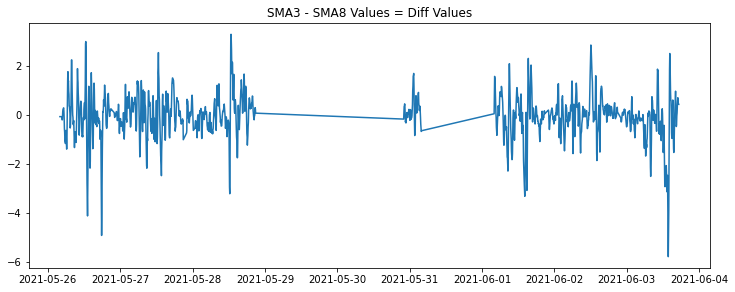

In [43]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Diff'], label  ='Diff Values')
plt.title('SMA3 - SMA8 Values = Diff Values')

In [44]:
df["Diff"]

Datetime
2021-05-26 00:00:00-04:00   -0.079132
2021-05-26 00:05:00-04:00   -0.079132
2021-05-26 00:10:00-04:00   -0.079132
2021-05-26 00:15:00-04:00   -0.079132
2021-05-26 00:20:00-04:00   -0.079132
                               ...   
2021-06-03 12:55:00-04:00    0.691666
2021-06-03 13:00:00-04:00    0.591654
2021-06-03 13:05:00-04:00    0.433329
2021-06-03 13:10:00-04:00    0.420853
2021-06-03 13:13:40-04:00    0.420848
Name: Diff, Length: 1521, dtype: float64

In [50]:
# Using a for loop to compare 3sma with 8sma and generating a signal.
postition =0
#position = int
for i in range(len(df)):
    if  -1 > df["Diff"][i] < 1:  # The value should be considered with ATR (7) Inicator.
        #print(" Buy Signal")
        print("Buy Entry Price", df["Close"][i])
        print("Entry Time:  ", datetime.datetime.now())
        print("Target", df["Close"][i] +1.8 ) # Risk Reward Ratio 1:2, Take profit = 4 X ATR for 5 minute timeframe
        print("Stoploss", df["Close"][i]-0.90) # Risk Reward Ratio 1:2, Stop loss = 2 X ATR for 5 minute timeframe
        
        print("**********************")
        #print("Datetime", df["Datetime"])
    else:
        #print('Sell signal')
        print("Sell Entry Price", df["Close"][i])
        print("Entry Time:  ", datetime.datetime.now())
        print("Target", df["Close"][i] -1.8) # Risk Reward Ratio 1:2, Take profit = 4 X ATR for 5 minute timeframe
        print("Stoploss", df["Close"][i] + 0.90) # Risk Reward Ratio 1:2, Stop loss = 2 X ATR for 5 minute timeframe
        print("**********************")
       

Sell Entry Price 1907.0999755859375
Entry Time:   2021-06-03 23:02:21.459730
Target 1905.2999755859375
Stoploss 1907.9999755859376
**********************
Sell Entry Price 1906.699951171875
Entry Time:   2021-06-03 23:02:21.460727
Target 1904.899951171875
Stoploss 1907.599951171875
**********************
Sell Entry Price 1906.5999755859375
Entry Time:   2021-06-03 23:02:21.460727
Target 1904.7999755859375
Stoploss 1907.4999755859376
**********************
Sell Entry Price 1907.4000244140625
Entry Time:   2021-06-03 23:02:21.461724
Target 1905.6000244140625
Stoploss 1908.3000244140626
**********************
Sell Entry Price 1907.0
Entry Time:   2021-06-03 23:02:21.461724
Target 1905.2
Stoploss 1907.9
**********************
Sell Entry Price 1906.9000244140625
Entry Time:   2021-06-03 23:02:21.462726
Target 1905.1000244140625
Stoploss 1907.8000244140626
**********************
Sell Entry Price 1906.800048828125
Entry Time:   2021-06-03 23:02:21.462726
Target 1905.000048828125
Stoploss 1907.

**********************
Sell Entry Price 1896.0999755859375
Entry Time:   2021-06-03 23:02:21.656088
Target 1894.2999755859375
Stoploss 1896.9999755859376
**********************
Sell Entry Price 1895.699951171875
Entry Time:   2021-06-03 23:02:21.656088
Target 1893.899951171875
Stoploss 1896.599951171875
**********************
Sell Entry Price 1895.5
Entry Time:   2021-06-03 23:02:21.656088
Target 1893.7
Stoploss 1896.4
**********************
Sell Entry Price 1895.0999755859375
Entry Time:   2021-06-03 23:02:21.656088
Target 1893.2999755859375
Stoploss 1895.9999755859376
**********************
Sell Entry Price 1895.0
Entry Time:   2021-06-03 23:02:21.656088
Target 1893.2
Stoploss 1895.9
**********************
Sell Entry Price 1895.5
Entry Time:   2021-06-03 23:02:21.656088
Target 1893.7
Stoploss 1896.4
**********************
Sell Entry Price 1894.800048828125
Entry Time:   2021-06-03 23:02:21.656088
Target 1893.000048828125
Stoploss 1895.700048828125
**********************
Sell Entry Pr

**********************
Sell Entry Price 1898.9000244140625
Entry Time:   2021-06-03 23:02:21.872634
Target 1897.1000244140625
Stoploss 1899.8000244140626
**********************
Sell Entry Price 1899.199951171875
Entry Time:   2021-06-03 23:02:21.873633
Target 1897.399951171875
Stoploss 1900.099951171875
**********************
Sell Entry Price 1899.699951171875
Entry Time:   2021-06-03 23:02:21.873633
Target 1897.899951171875
Stoploss 1900.599951171875
**********************
Sell Entry Price 1900.0999755859375
Entry Time:   2021-06-03 23:02:21.873633
Target 1898.2999755859375
Stoploss 1900.9999755859376
**********************
Sell Entry Price 1900.199951171875
Entry Time:   2021-06-03 23:02:21.873633
Target 1898.399951171875
Stoploss 1901.099951171875
**********************
Sell Entry Price 1900.0999755859375
Entry Time:   2021-06-03 23:02:21.875626
Target 1898.2999755859375
Stoploss 1900.9999755859376
**********************
Sell Entry Price 1900.5999755859375
Entry Time:   2021-06-03 2

Sell Entry Price 1900.699951171875
Entry Time:   2021-06-03 23:02:22.061234
Target 1898.899951171875
Stoploss 1901.599951171875
**********************
Sell Entry Price 1901.5999755859375
Entry Time:   2021-06-03 23:02:22.061234
Target 1899.7999755859375
Stoploss 1902.4999755859376
**********************
Sell Entry Price 1902.0999755859375
Entry Time:   2021-06-03 23:02:22.061234
Target 1900.2999755859375
Stoploss 1902.9999755859376
**********************
Sell Entry Price 1901.800048828125
Entry Time:   2021-06-03 23:02:22.061234
Target 1900.000048828125
Stoploss 1902.700048828125
**********************
Sell Entry Price 1902.800048828125
Entry Time:   2021-06-03 23:02:22.061234
Target 1901.000048828125
Stoploss 1903.700048828125
**********************
Sell Entry Price 1904.800048828125
Entry Time:   2021-06-03 23:02:22.061234
Target 1903.000048828125
Stoploss 1905.700048828125
**********************
Sell Entry Price 1904.199951171875
Entry Time:   2021-06-03 23:02:22.061234
Target 1902.

Stoploss 1909.099951171875
**********************
Sell Entry Price 1908.5999755859375
Entry Time:   2021-06-03 23:02:22.247150
Target 1906.7999755859375
Stoploss 1909.4999755859376
**********************
Sell Entry Price 1909.9000244140625
Entry Time:   2021-06-03 23:02:22.247150
Target 1908.1000244140625
Stoploss 1910.8000244140626
**********************
Sell Entry Price 1910.0
Entry Time:   2021-06-03 23:02:22.247150
Target 1908.2
Stoploss 1910.9
**********************
Sell Entry Price 1909.699951171875
Entry Time:   2021-06-03 23:02:22.247150
Target 1907.899951171875
Stoploss 1910.599951171875
**********************
Sell Entry Price 1910.800048828125
Entry Time:   2021-06-03 23:02:22.247150
Target 1909.000048828125
Stoploss 1911.700048828125
**********************
Sell Entry Price 1910.9000244140625
Entry Time:   2021-06-03 23:02:22.247150
Target 1909.1000244140625
Stoploss 1911.8000244140626
**********************
Sell Entry Price 1910.300048828125
Entry Time:   2021-06-03 23:02:22

Target 1898.7999755859375
Stoploss 1901.4999755859376
**********************
Sell Entry Price 1901.699951171875
Entry Time:   2021-06-03 23:02:22.449041
Target 1899.899951171875
Stoploss 1902.599951171875
**********************
Sell Entry Price 1901.5999755859375
Entry Time:   2021-06-03 23:02:22.450038
Target 1899.7999755859375
Stoploss 1902.4999755859376
**********************
Sell Entry Price 1900.0999755859375
Entry Time:   2021-06-03 23:02:22.450038
Target 1898.2999755859375
Stoploss 1900.9999755859376
**********************
Sell Entry Price 1897.0999755859375
Entry Time:   2021-06-03 23:02:22.450038
Target 1895.2999755859375
Stoploss 1897.9999755859376
**********************
Buy Entry Price 1898.4000244140625
Entry Time:   2021-06-03 23:02:22.451036
Target 1900.2000244140625
Stoploss 1897.5000244140624
**********************
Buy Entry Price 1899.4000244140625
Entry Time:   2021-06-03 23:02:22.453031
Target 1901.2000244140625
Stoploss 1898.5000244140624
**********************
Sell

Target 1907.899951171875
Stoploss 1910.599951171875
**********************
Sell Entry Price 1909.4000244140625
Entry Time:   2021-06-03 23:02:22.638555
Target 1907.6000244140625
Stoploss 1910.3000244140626
**********************
Sell Entry Price 1910.300048828125
Entry Time:   2021-06-03 23:02:22.638555
Target 1908.500048828125
Stoploss 1911.200048828125
**********************
Sell Entry Price 1911.0999755859375
Entry Time:   2021-06-03 23:02:22.639553
Target 1909.2999755859375
Stoploss 1911.9999755859376
**********************
Sell Entry Price 1910.5
Entry Time:   2021-06-03 23:02:22.639553
Target 1908.7
Stoploss 1911.4
**********************
Sell Entry Price 1909.5
Entry Time:   2021-06-03 23:02:22.639553
Target 1907.7
Stoploss 1910.4
**********************
Sell Entry Price 1909.4000244140625
Entry Time:   2021-06-03 23:02:22.640550
Target 1907.6000244140625
Stoploss 1910.3000244140626
**********************
Sell Entry Price 1910.800048828125
Entry Time:   2021-06-03 23:02:22.640550


In [ ]:
#**************************************************************************************************************************8#